In [1]:
#Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from matplotlib import style

In [2]:
sales = pd.read_csv('C://Users//sandisk//Downloads//DataScience using PYTHON//Case Studies//Python Foundation Case Study 4 - Python Visualization Case Study//Case Study 4 - Python Visualizations Case Study//SalesData.csv//')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [4]:
sales.columns

Index(['AccountId', 'AccountName', 'Region', 'Division', 'City', 'State',
       'Tier', 'Month', 'Sales2015', 'Sales2016', 'Units2015', 'Units2016',
       'TargetAchevied2015', 'TargetAchevied2016'],
      dtype='object')

In [5]:
#1. Compare Sales by region for 2016 with 2015 using bar chart

In [6]:
chart1 = sales.groupby(by = ['Region'])[['Sales2015', 'Sales2016']].sum()
chart1

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


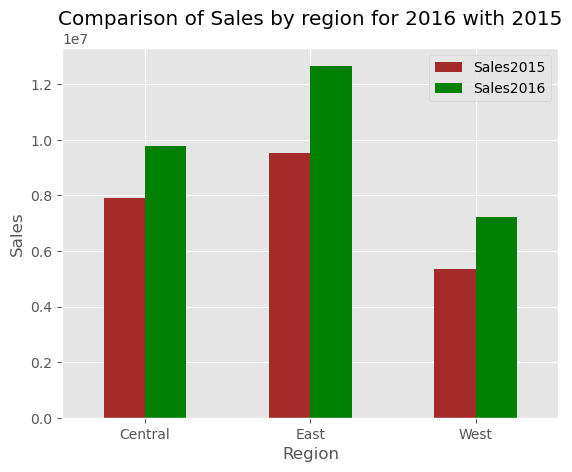

<Figure size 640x480 with 0 Axes>

In [7]:
style.use('ggplot')
chart1.plot(kind = 'bar',color = ['brown','green'])
plt.title("Comparison of Sales by region for 2016 with 2015")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.xticks(rotation = 0)
plt.show()
plt.tight_layout()

In [8]:
#2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

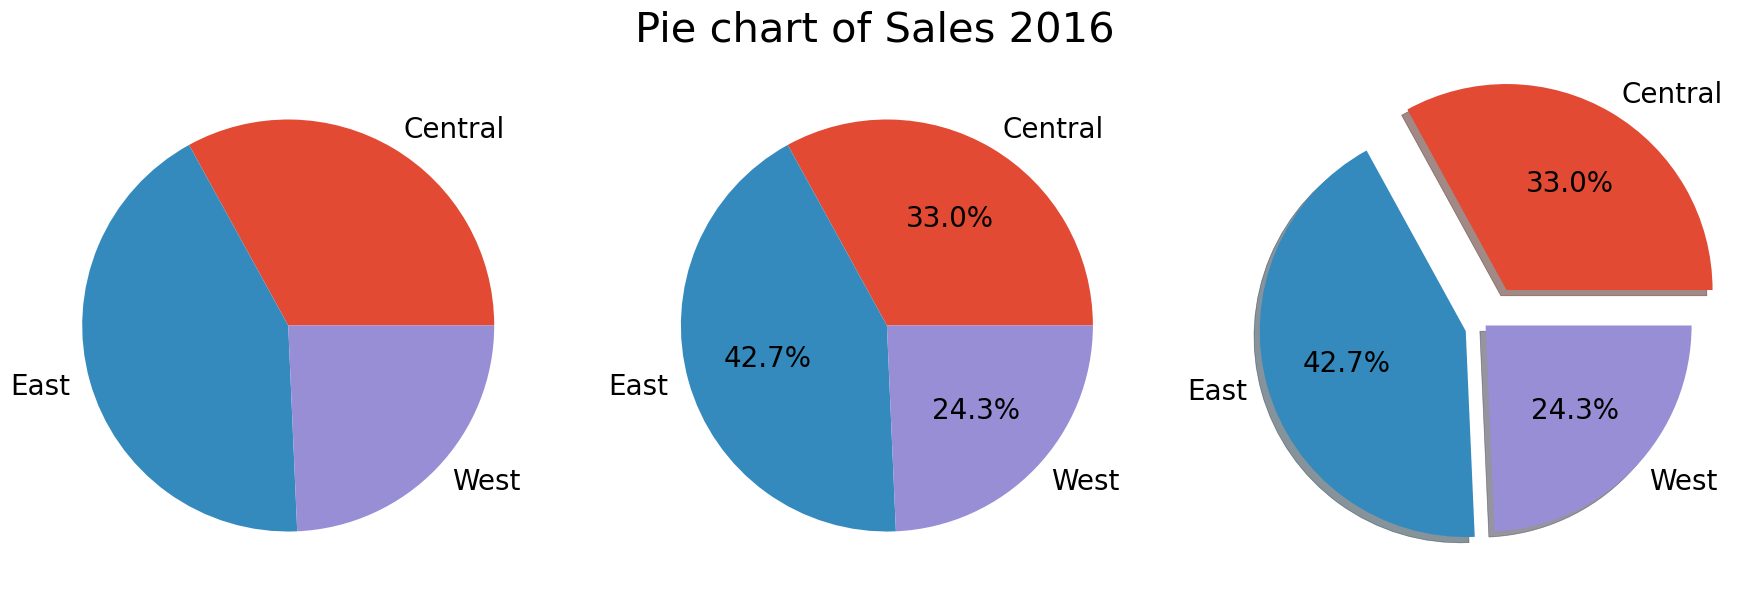

In [9]:
total_sales_2016 = sales['Sales2016'].sum()


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

region_sales_2016 = sales.groupby('Region')['Sales2016'].sum()

axes[0].pie(region_sales_2016, labels = region_sales_2016.index,textprops={'fontsize': 20})

axes[1].pie(region_sales_2016, autopct='%1.1f%%',labels = region_sales_2016.index,textprops={'fontsize': 20})

myexplode = [0.2, 0.1, 0]
axes[2].pie(region_sales_2016, explode = myexplode, shadow = True, autopct = '%1.1f%%',labels = region_sales_2016.index,textprops={'fontsize': 20})

plt.suptitle('Pie chart of Sales 2016',fontsize=30)
plt.tight_layout()
plt.show()

In [10]:
#3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [11]:
sales_central = sales[sales['Region'] == 'Central'].groupby(by = ['Tier'])[['Sales2015','Sales2016']].sum()

In [12]:
sales_east = sales[sales['Region'] == 'East'].groupby(by = ['Tier'])[['Sales2015','Sales2016']].sum()

In [13]:
sales_west = sales[sales['Region'] == 'West'].groupby(by = ['Tier'])[['Sales2015','Sales2016']].sum()

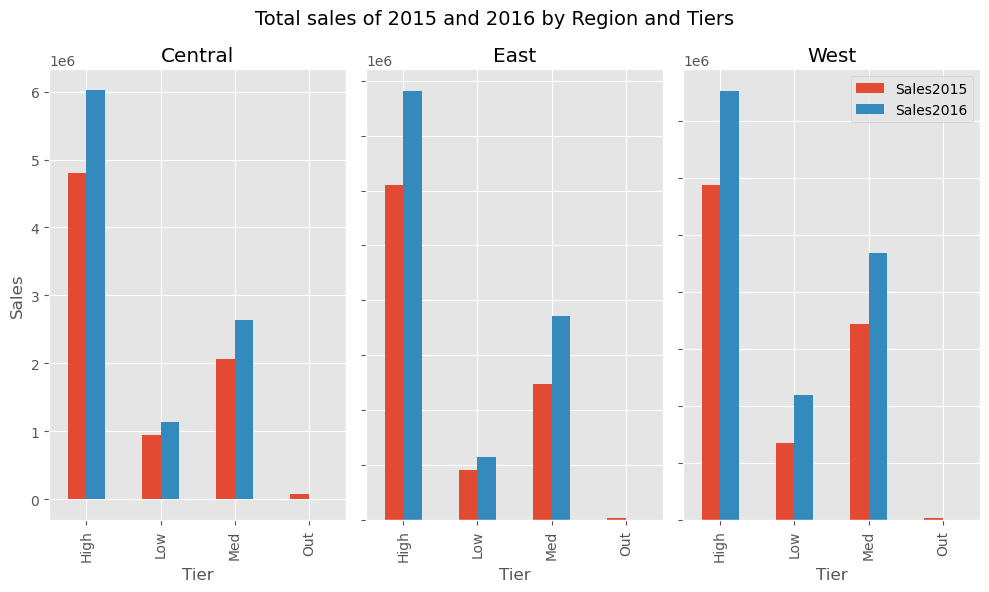

In [14]:
fig, axs = plt.subplots(nrows = 1, ncols = 3,figsize = (10,6))

plt.suptitle("Total sales of 2015 and 2016 by Region and Tiers",fontsize=14)
sales_central.plot(kind = 'bar', ax = axs[0], title = 'Central',sharey = True, ylabel = "Sales", legend = 0)
sales_east.plot(kind = 'bar', ax = axs[1],title = 'East',sharey = True, legend = 0)
sales_west.plot(kind = 'bar', ax = axs[2],title = 'West',sharey = True)


plt.tight_layout()
plt.show()

In [15]:
#4. In East region, which state registered a decline in 2016 as compared to 2015?

In [16]:
sales.columns

Index(['AccountId', 'AccountName', 'Region', 'Division', 'City', 'State',
       'Tier', 'Month', 'Sales2015', 'Sales2016', 'Units2015', 'Units2016',
       'TargetAchevied2015', 'TargetAchevied2016'],
      dtype='object')

In [17]:
chart4 = sales[sales['Region']=='East'].groupby(by = ['State'])[['Sales2015', 'Sales2016']].sum()

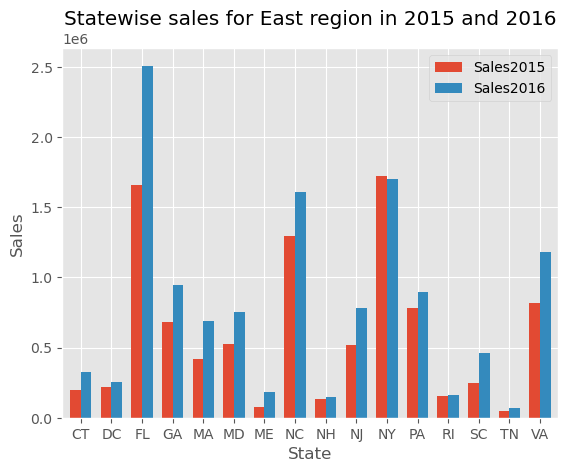

<Figure size 640x480 with 0 Axes>

In [18]:
chart4.plot(kind = 'bar', width = 0.7)
plt.title('Statewise sales for East region in 2015 and 2016')
plt.ylabel('Sales')
plt.xticks(rotation = 0)
plt.show()
plt.tight_layout()

In [19]:
#5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [20]:
chart5 = sales[sales['Tier']=='High'].groupby(by = ['Division'])[['Units2015', 'Units2016']].sum()

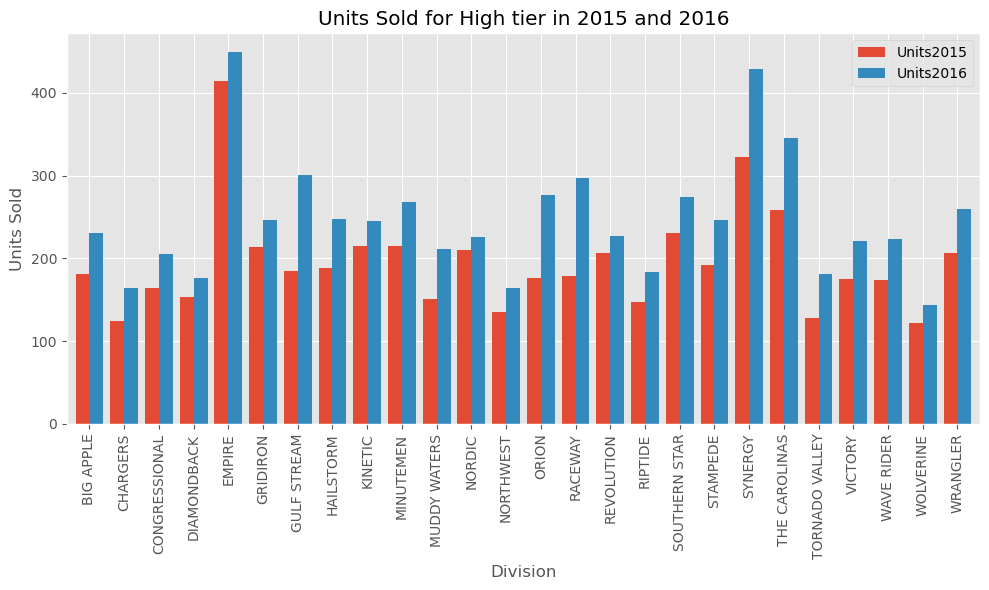

In [31]:
chart5.plot(kind = 'bar',figsize = (10,6), width = 0.8)
plt.title('Units Sold for High tier in 2015 and 2016')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

In [22]:
#6. Create a new column Qtr using numpy.where() or any suitable utility in the imported 
#dataset. The Quarters are based on months and defined as -
#• Jan - Mar : Q1
#• Apr - Jun : Q2
#• Jul - Sep : Q3
#• Oct - Dec : Q4

In [23]:
def Quarter(x):
    if (x == 'Jan')| (x == 'Feb')| (x== 'Mar'):
        return ('Q1')
    elif (x == 'Apr')| (x== 'May')| (x == 'Jun'):
        return ('Q2')
    elif (x == 'Jul')| (x== 'Aug')| (x == 'Sep'):
        return ('Q3')
    else:
        return ('Q4')
    
    
sales['Qtr'] = sales['Month'].apply(Quarter)

In [ ]:
#7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [25]:
chart7 = sales.groupby('Qtr')[['Sales2015','Sales2016']].sum()

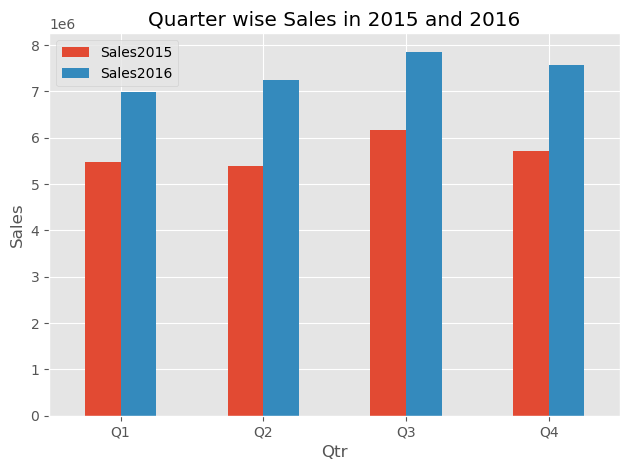

In [30]:
chart7.plot(kind = 'bar')
plt.legend(loc = 'best')
plt.xticks(rotation = 0)
plt.ylabel('Sales')
plt.title('Quarter wise Sales in 2015 and 2016')
plt.tight_layout()
plt.show()

In [ ]:
#8. Determine the composition of Qtr wise sales in 2016 with regards to all the Tiers in a pie chart.
#(Draw 4 pie charts representing a Quarter for each Tier)

In [32]:
sales['Tier'].unique()

array(['Low', 'Med', 'High', 'Out'], dtype=object)

In [47]:
Qtr1 = sales[sales['Qtr']=='Q1'].groupby('Tier')['Sales2016'].sum()

In [48]:
Qtr2 = sales[sales['Qtr']=='Q2'].groupby('Tier')['Sales2016'].sum()

In [49]:
Qtr3 = sales[sales['Qtr']=='Q3'].groupby('Tier')['Sales2016'].sum()

In [50]:
Qtr4 = sales[sales['Qtr']=='Q4'].groupby('Tier')['Sales2016'].sum()

In [51]:
sales['Sales2016'] = sales['Sales2016'].abs()

<Axes: title={'center': 'Qtr4'}, ylabel='Sales2016'>

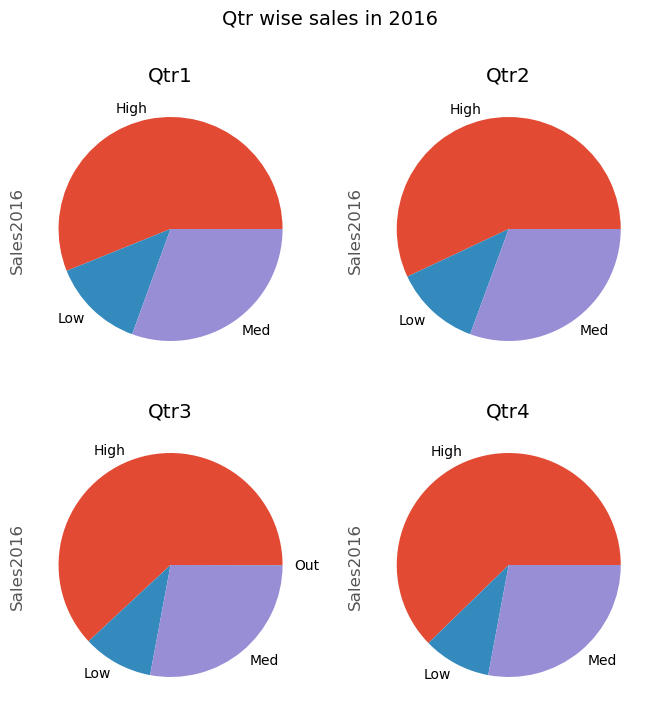

In [53]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))

plt.suptitle("Qtr wise sales in 2016",fontsize=14)

Qtr1.plot(kind = 'pie',ax = axs[0,0], title = 'Qtr1')
Qtr2.plot(kind = 'pie',ax = axs[0,1], title = 'Qtr2')
Qtr3.plot(kind = 'pie',ax = axs[1,0], title = 'Qtr3')
Qtr4.plot(kind = 'pie',ax = axs[1,1], title = 'Qtr4')